# Exploratory Data Analysis of LendingClub Loan Data

Peform exploratory data analysis on pre-processed LendingClub Loan Data prepared from [Data Preprocessing Jupyter Notebook](data_preprocessing.ipynb).

In [1]:
import global_variables as gv
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
} // disable auto-scrolling

<IPython.core.display.Javascript object>

In [3]:
# load data
data = pd.read_pickle('data/processed_data.pkl')
data.head()

,loan_amnt,funded_amnt,int_rate,term,issue_d,loan_status,purpose,annual_inc,dti,revol_bal,...,months_in_loan,grade_rank,loan_status_rank,loan_return,loan_amnt_cat,int_rate_cat,annual_inc_cat,dti_cat,revol_bal_cat,delinq_2yrs_cat
0,40000.0,40000.0,9.92,0,2018-03-01,Charged Off,debt_consolidation,140000.0,10.67,16312.0,...,4,6,3,Unprofitable,"> 30,000",<= 10,"> 100,000",(10 to 15],"(15,000 to 20,000]",<= 1
1,40000.0,40000.0,6.11,0,2018-10-01,Charged Off,credit_card,160000.0,11.90,21623.0,...,0,7,3,Unprofitable,"> 30,000",<= 10,"> 100,000",(10 to 15],"> 20,000",<= 1
2,40000.0,40000.0,16.91,1,2018-07-01,Charged Off,debt_consolidation,111000.0,18.84,25834.0,...,0,5,3,Unprofitable,"> 30,000",(15 to 20],"> 100,000",(15 to 20],"> 20,000",<= 1
3,40000.0,40000.0,7.35,1,2017-12-01,Charged Off,home_improvement,140000.0,5.95,16398.0,...,1,7,3,Unprofitable,"> 30,000",<= 10,"> 100,000",(5 to 10],"(15,000 to 20,000]",<= 1
4,40000.0,40000.0,9.44,1,2017-12-01,Charged Off,other,130922.0,12.57,209.0,...,1,6,3,Unprofitable,"> 30,000",<= 10,"> 100,000",(10 to 15],"<= 5,000",<= 1


## Data Distribution

In [4]:
def annotate(chart):
    # place value label above each bar
    for p in chart.patches:
        chart.annotate("{:,}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

### Return on Investment (ROI)

In [5]:
def histogram(dataIn, title, figsize=(10, 5)):

    # setting the dimensions of the plot
    fig, ax = plt.subplots(figsize=figsize)

    #calculate interquartile range 
    q3, q1 = np.percentile(np.array(dataIn), [75 ,25])
    iqr = q3 - q1

    # calculate optimal number of bins for histogram using Freedman-Diaconis formula
    h = 2*iqr*pow(len(dataIn), -1/3)
    bins = math.ceil((max(dataIn) - min(dataIn))/h)

    # plot histogram
    plt.hist(dataIn, bins, edgecolor='blue')

    # hide right and top borders
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set plot's attribute and display plot
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.title('Number of Loans: ' + "{:,}".format(len(dataIn)))
    plt.xlabel('Return on Investment', fontsize=14)
    plt.ylabel('Number of Loans', fontsize=14)
    plt.show()

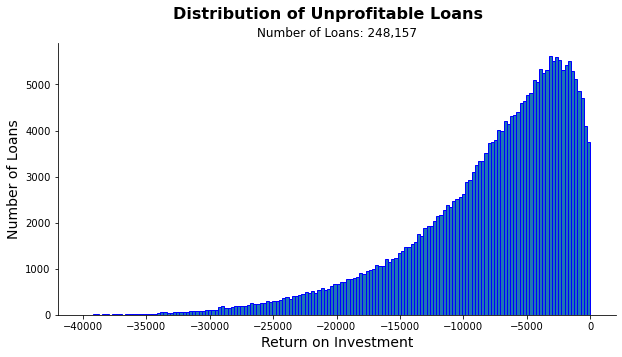

In [6]:
histogram(list(data[data['roi'] <= 0]['roi'].sort_values()), 'Distribution of Unprofitable Loans')

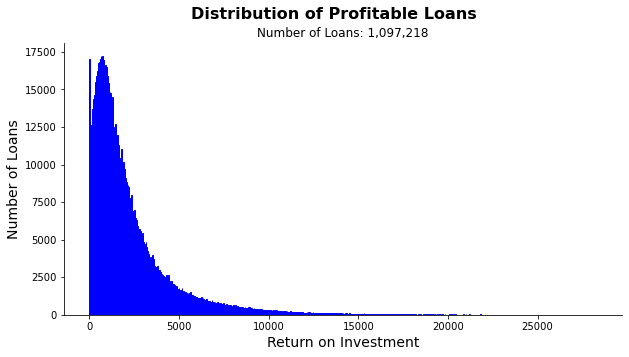

In [7]:
histogram(list(data[data['roi'] > 0]['roi'].sort_values()), 'Distribution of Profitable Loans')

### Loan Return

In [8]:
def pie_chart(indict, n,  title, precision=2):
    '''Create a pie chart'''
    
    # compute count percentage
    pcts = [np.round(x*100/n, precision) for x in list(indict.values())]
    chart_labels = [str(x) + '%' for x in pcts]
    
    # set legend labels
    labels = list(indict.keys())
    legends = []
    for i, label in enumerate(labels):
        legends.append(label)
    
    # plot pie chart
    plt.pie(pcts, labels=chart_labels)
    
    # set legend and title
    plt.legend(legends, frameon=False, bbox_to_anchor=(1.7, 1))
    plt.title(title, fontsize=16, fontweight='bold')
    plt.show()

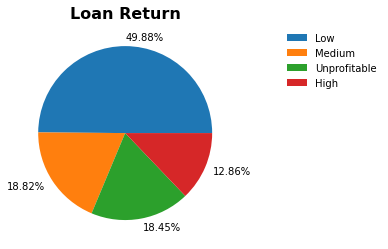

In [9]:
pie_chart(data['loan_return'].value_counts().to_dict(), data.shape[0], 'Loan Return')

### Categorical Attributes

In [10]:
def countplot(dataIn, attribute, xlabel, orientation=0, figsize=(8, 5)):
    # setting the dimensions of the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # plot bar plot
    chart = sns.countplot(x=attribute, data=dataIn,
                          order=dataIn[attribute].value_counts().index)
    annotate(chart)
    
    # hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.title('Data Distribution per ' + xlabel, fontsize=16, pad=20)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel('Number of Loans', fontsize=14)
    plt.xticks(rotation=orientation)
    plt.show()

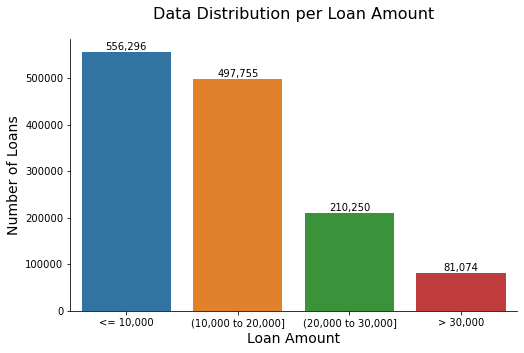

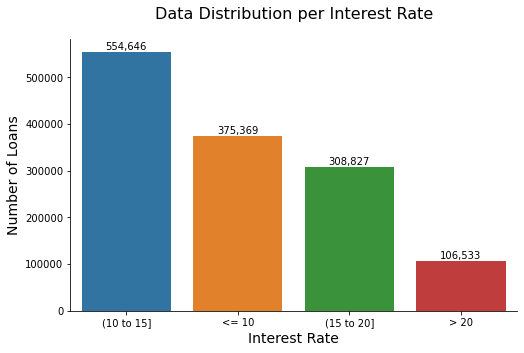

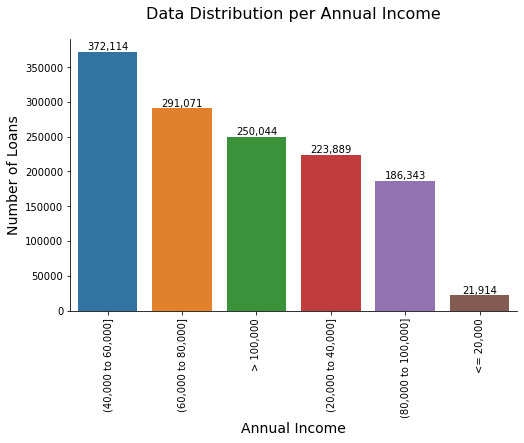

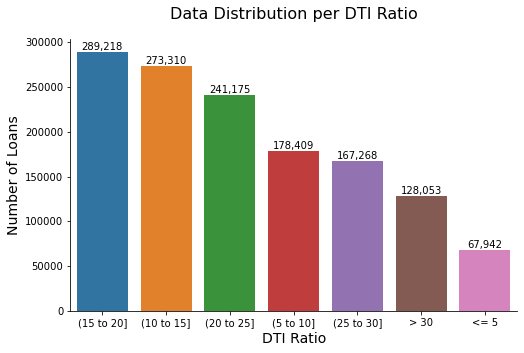

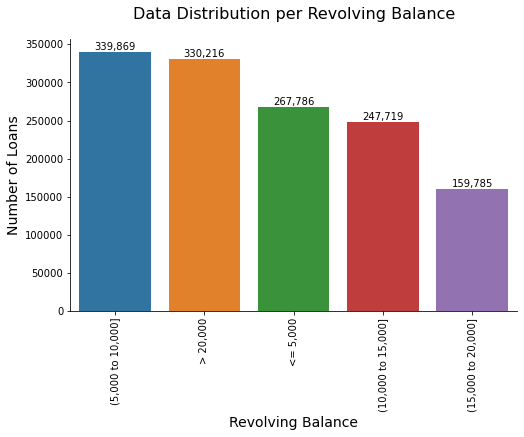

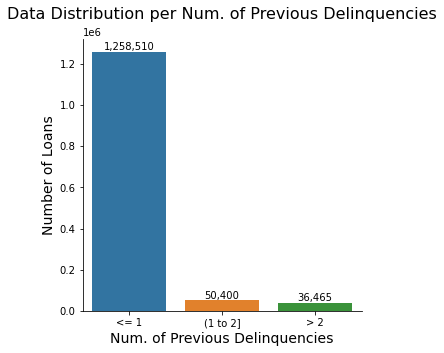

In [11]:
cat_attrs = ['loan_amnt_cat', 'int_rate_cat', 'annual_inc_cat', 'dti_cat', 
             'revol_bal_cat', 'delinq_2yrs_cat']
x_labels = ['Loan Amount', 'Interest Rate', 'Annual Income', 'DTI Ratio', 
            'Revolving Balance', 'Num. of Previous Delinquencies']
orientations = [0, 0, 90, 0, 90, 0]
figsizes = [(8, 5), (8, 5), (8, 5), (8, 5), (8, 5), (5, 5)]

for i, attr in enumerate(cat_attrs):
    countplot(data, attr, x_labels[i], orientations[i], figsizes[i])

### Months in Loan

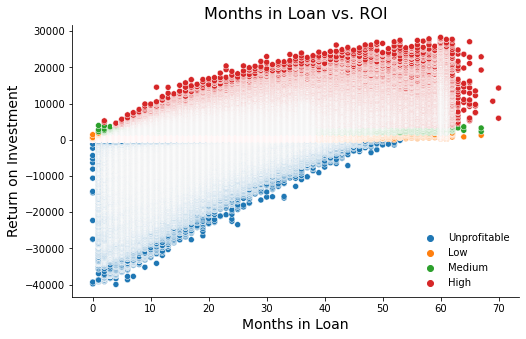

In [12]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(x='months_in_loan', y='roi', data=data, hue='loan_return')

# hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(frameon=False, loc='lower right')
plt.title('Months in Loan vs. ROI', fontsize=16)
plt.xlabel('Months in Loan', fontsize=14)
plt.ylabel('Return on Investment', fontsize=14)
plt.show()

## Correlation Coefficient

In [13]:
def compute_corr(indata, col1, col2):
    '''
    Compute Pearson correlation between two attributes.
    
    Parameters:
        indata: input data
        col1: attribute 1
        col2: attribute 2
    
    Return correlation score.
    '''
    
    # compute covariance
    covariance = sum((indata[col1] - data[col1].mean()) * (indata[col2] - indata[col2].mean())) / indata.shape[0]
    
    # compute correlation
    corr = np.round(covariance / (indata[col1].std() * indata[col2].std()), 4)
    return corr

In [14]:
# build correlation dataframe
selected_cols = ['loan_amnt', 'int_rate', 'term', 'annual_inc', 'dti', 'revol_bal', 
                 'home_ownership', 'delinq_2yrs', 'roi', 'months_in_loan', 
                 'grade_rank']
annot_cols = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
correlations = []

for c1 in selected_cols:
    corr = []
    for c2 in selected_cols:
        corr.append(compute_corr(data, c1, c2))
    correlations.append(corr)

In [15]:
corr_df = pd.DataFrame(correlations, columns=annot_cols, index=annot_cols)
corr_df

,A,B,C,D,E,F,G,H,I,J,K
A,1.0000,0.1415,0.3807,0.3120,0.0328,0.3168,-0.0225,-0.0028,0.0294,0.0109,-0.1407
B,0.1415,1.0000,0.4173,-0.0721,0.1470,-0.0277,0.0033,0.0483,-0.0734,-0.1070,-0.9523
C,0.3807,0.4173,1.0000,0.0500,0.0597,0.0714,-0.0202,-0.0086,-0.0353,0.0165,-0.4240
D,0.3120,-0.0721,0.0500,1.0000,-0.1403,0.2867,-0.0249,0.0405,0.0375,-0.0145,0.0687
E,0.0328,0.1470,0.0597,-0.1403,1.0000,0.1086,0.0135,-0.0078,-0.0392,-0.0084,-0.1458
F,0.3168,-0.0277,0.0714,0.2867,0.1086,1.0000,0.0055,-0.0281,0.0486,0.0380,0.0255
G,-0.0225,0.0033,-0.0202,-0.0249,0.0135,0.0055,1.0000,0.0013,-0.0132,-0.0212,-0.0038
H,-0.0028,0.0483,-0.0086,0.0405,-0.0078,-0.0281,0.0013,1.0000,-0.0072,0.0052,-0.0530
I,0.0294,-0.0734,-0.0353,0.0375,-0.0392,0.0486,-0.0132,-0.0072,1.0000,0.4328,0.0664
J,0.0109,-0.1070,0.0165,-0.0145,-0.0084,0.0380,-0.0212,0.0052,0.4328,1.0000,0.0861


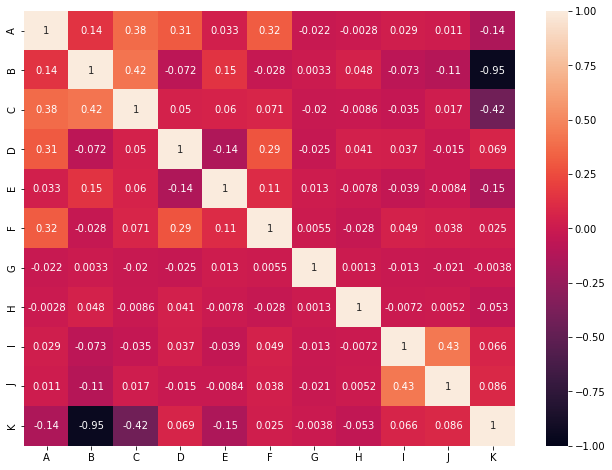

In [16]:
ax, fig = plt.subplots(figsize=(11,8))
_ = sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True)

plt.show()